_____
# Social Network Ads
____
We are creating a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

#### Dataset has below columns:
* UserID: UserId of the customer
* Gender: Gender of the customer
* Age: Age of customer
* Estimated Salary: Estimated salary of the customer
* Purchased:States if the customer has purchased or not.(1=Purchased, 0= not purchased)

Dataset has 400 non null rows
____

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Get the Data

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


## Check for null values

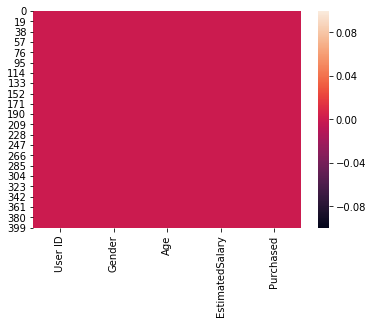

In [6]:
sns.heatmap(dataset.isnull())

#### Gender is non numeric column so we will convert it to numeric for further processing

In [7]:
sex = pd.get_dummies(dataset['Gender'],drop_first=True)

#### Purchased is not depended on the UserID column hence we will remove the column

In [8]:
dataset.drop(['Gender','User ID'],axis=1, inplace=True)

In [9]:
data = pd.concat([sex,dataset],axis=1)

In [10]:
data.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## Check correlation

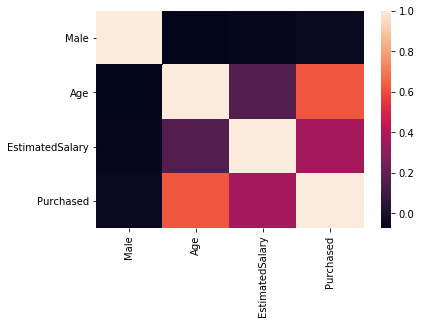

In [11]:
sns.heatmap(data.corr())

#### Male column is not correlated to the purchased column hence we will drop the column

In [12]:
data.drop('Male',axis=1,inplace=True)

In [13]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Standardize the Variables

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(data.drop('Purchased',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_features = scaler.transform(data.drop('Purchased',axis=1))

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


#### Plotting of data using scatter plot

In [19]:
narr = data.values

In [21]:
y= data['Purchased']

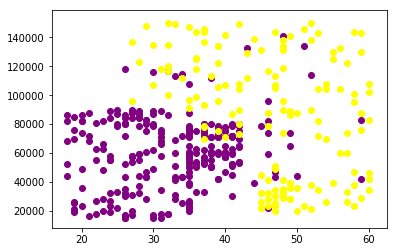

In [22]:
plt.scatter(narr[y==0,0], narr[y==0,1], color='purple')
plt.scatter(narr[y==1,0], narr[y==1,1], color='yellow')

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,data['Purchased'],
                                                    test_size=0.30)

## Using Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [27]:
y_pred = classifier.predict(X_test)

## Predictions and Evaluations


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[68,  6],
       [ 8, 38]], dtype=int64)

### Conclusion:
From the results we could see that the Naive Bayes could precisely predict weather the customer purchased or not